In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-1m.zip',
        tmpdir + '/ml-1m.zip')
    zipfile.ZipFile(tmpdir + '/ml-1m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-1m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-1m/ratings.dat',
        sep='::',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-1m/users.dat',
        sep='::',
        names=['USER_ID','GENDER','AGE','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-1m/movies.dat',
        sep='::', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'GENRES'],
    )

movies.dat
ratings.dat
README
users.dat



/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/home/yifeim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warni

## run diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
        USER_ID  ITEM_ID  RATING   TIMESTAMP
336355     1980     1036       4   974769298
204776     1260     1994       4  1004038728
480560     2948     1580       4   971242614
89551       590     3298       4   975911896
687159     4112     2978       3   965369287
920227     5557      509       5   959440775
485418     2986     1092       3   970812396
916651     5539     2852       4   977625537
702730     4214     1213       5   965318857
686475     4107     2699       4   965519571

=== Interactions table, original shape=(1000209, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (1000209, 4)
duplication rate 0.0
drop_duplicates shape (1000209, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             RATING     TIMESTAMP
count  1.000209e+06  1.000209e+06
mean   3.581564e+00  9.722437e+08
std    1.1171

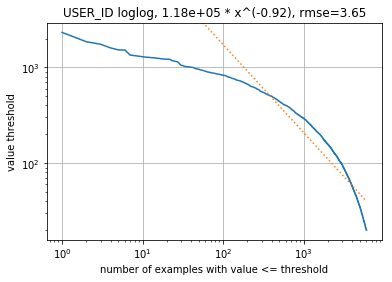


=== ITEM_ID top 10 categories ===
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64


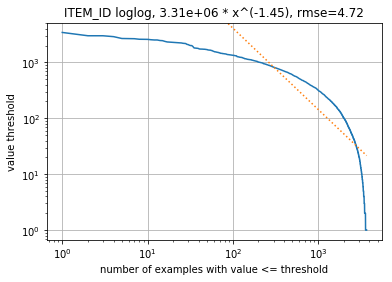


=== Hourly activity pattern ===
0     55397
1     58223
2     59068
3     62396
4     55443
5     42064
6     33987
7     27519
8     20547
9     12959
10     9370
11     8617
12    13221
13    20917
14    28865
15    40385
16    48954
17    53565
18    59138
19    59201
20    59709
21    65491
22    55098
23    50075
dtype: int64

=== Day of week activity pattern ===
0    173931
1    159272
2    141176
3    142722
4    129438
5    108692
6    144978
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


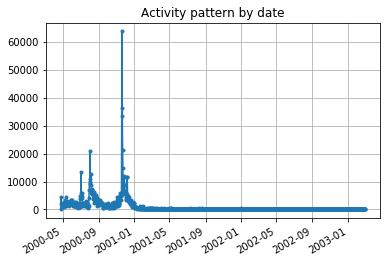

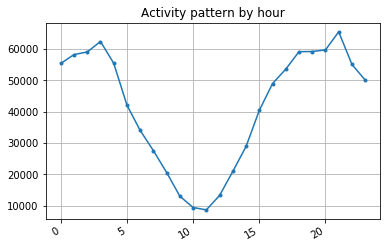

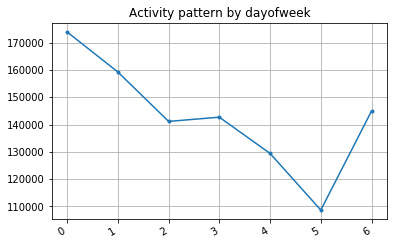


=== Temporal shift analysis ===

temporal out-sample items, freq=1d, hist_len=1, avg_loss=47.6%, time=1.1s
temporal out-sample items, freq=1d, hist_len=10, avg_loss=19.0%, time=1.2s
temporal out-sample items, freq=1d, hist_len=100, avg_loss=2.8%, time=1.4s
temporal out-sample items, freq=1d, hist_len=1000, avg_loss=0.6%, time=1.7s


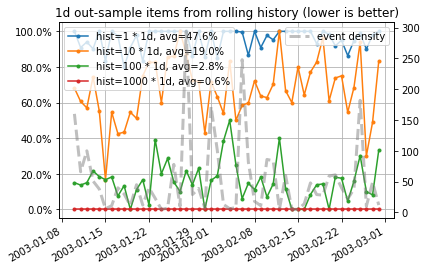

temporal cross-entropy, freq=1d, hist_len=1, avg_loss=9.74, time=1.2s
temporal cross-entropy, freq=1d, hist_len=10, avg_loss=8.32, time=1.3s
temporal cross-entropy, freq=1d, hist_len=100, avg_loss=7.63, time=1.5s
temporal cross-entropy, freq=1d, hist_len=1000, avg_loss=7.59, time=1.9s


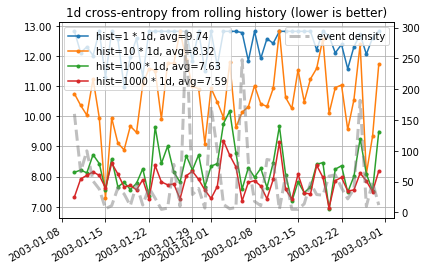

temporal out-sample items, freq=3h, hist_len=1, avg_loss=77.3%, time=1.4s
temporal out-sample items, freq=3h, hist_len=10, avg_loss=40.4%, time=1.7s
temporal out-sample items, freq=3h, hist_len=100, avg_loss=14.3%, time=3.0s
temporal out-sample items, freq=3h, hist_len=1000, avg_loss=1.8%, time=6.2s


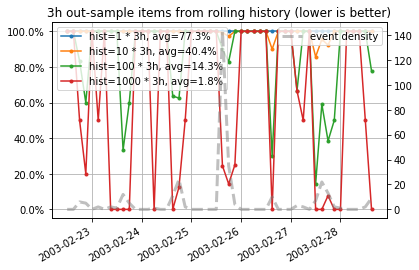

temporal cross-entropy, freq=3h, hist_len=1, avg_loss=11.35, time=1.3s
temporal cross-entropy, freq=3h, hist_len=10, avg_loss=9.36, time=1.7s
temporal cross-entropy, freq=3h, hist_len=100, avg_loss=8.09, time=3.2s
temporal cross-entropy, freq=3h, hist_len=1000, avg_loss=7.59, time=6.9s


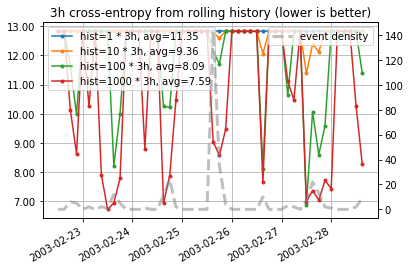


=== session time delta describe ===
count    9.941690e+05
mean     4.986574e+04
std      9.525371e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+01
max      8.892327e+07
Name: TIMESTAMP, dtype: float64


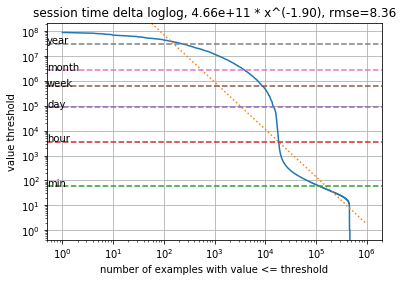

/home/yifeim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


=== user time span describe ===
count    6.040000e+03
mean     8.207777e+06
std      1.917298e+07
min      1.060000e+02
25%      1.207500e+03
50%      4.068500e+03
75%      2.021375e+06
max      8.924779e+07
Name: TIMESTAMP, dtype: float64


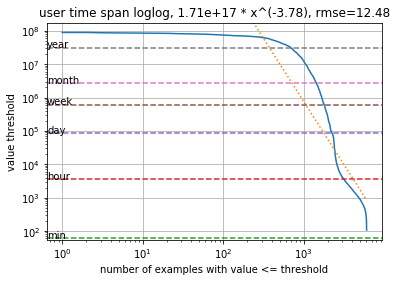

########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
      USER_ID GENDER  AGE  OCCUPATION ZIPCODE
2699     2700      M   25           7   30117
5225     5226      M   35           0   98122
3732     3733      M   18           4   02777
4549     4550      M   18          16   24541
1806     1807      M   18          17   20742
2701     2702      M   45           6   65201
1049     1050      M   25           1   97302
2651     2652      M   35          20   84010
2942     2943      M   35          12   95864
5357     5358      M   35           7   10625

=== Users table, original shape=(6040, 5) ===

Missing rate of all user meta-data 0.0
User coldstart rate 0.0

=== Describe  ===

               AGE   OCCUPATION
count  6040.000000  6040.000000
mean     30.639238     8.146854
std      12.895962     6.329511
min       1.000000     0.000000
25%      25.000000     3.000000
50%      25.000000     7.000000
75%      35.000000    1

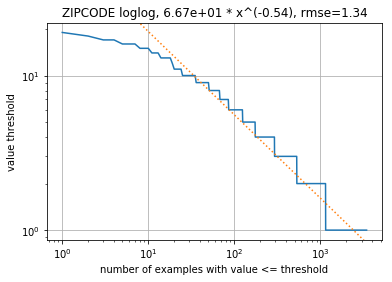

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.5392588567551565)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                     _TITLE              GENRES
759       769  Marlene Dietrich: Shadow and Light (1996)         Documentary
1055     1069                    Murder, My Sweet (1944)  Film-Noir|Thriller
2022     2091          Return from Witch Mountain (1978)   Children's|Sci-Fi
1261     1281                 Great Dictator, The (1940)              Comedy
1103     1119                              Drunks (1997)               Drama
2149     2218                    Juno and Paycock (1930)               Drama
1502     1541                    Addicted to Love (1997)      Comedy|Romance
975       987                               Bliss (1997)       Drama|Romance
3729     3798                   What Lies Beneath (2000)            Thriller
2281     2350                     Heart Condition (1990)              Comedy

=== Items table, original shape=(388

/home/yifeim/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


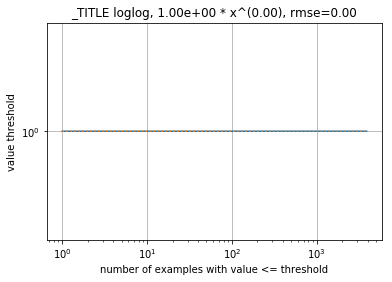


=== GENRES top 10 categories ===
Drama         1603
Comedy        1200
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=0.0)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))


In [3]:
diagnose(interactions, users, items)